Project-1 Neural Network for Handwritten Digit Classification

In [ ]:
# to view whether it using GPU, ignore if not using COLAB
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

# Data prepare and process
## 1. Familiarisation of Dataset


In [ ]:
# install library idx2numpy so we can read the idx3-ubyte and transfer to numpy in python
!pip install idx2numpy

In [ ]:
# I use google drive for import dataset, hence, this code section is needed to mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import library
import numpy as np
import idx2numpy
import matplotlib.pyplot as plt

import tensorflow as tf
from datetime import datetime

Data from http://yann.lecun.com/exdb/mnist/

In [ ]:
# Import dataset to numpy format
trainImages = idx2numpy.convert_from_file('/content/drive/MyDrive/project1/train-images.idx3-ubyte').astype('float32')
trainLabels = idx2numpy.convert_from_file('/content/drive/MyDrive/project1/train-labels.idx1-ubyte')

validImages = idx2numpy.convert_from_file('/content/drive/MyDrive/project1/t10k-images.idx3-ubyte').astype('float32')
validLabels = idx2numpy.convert_from_file('/content/drive/MyDrive/project1/t10k-labels.idx1-ubyte')

# Rescale to [0,1]
trainImages = trainImages / 255.0
validImages = validImages / 255.0

# view shape of the dataset
print(trainImages.shape)
print(validImages.shape)


(60000, 28, 28)
(10000, 28, 28)


## 2. Visualize a few objects in the training and test sets, and then check whether the corresponding labels are correct.

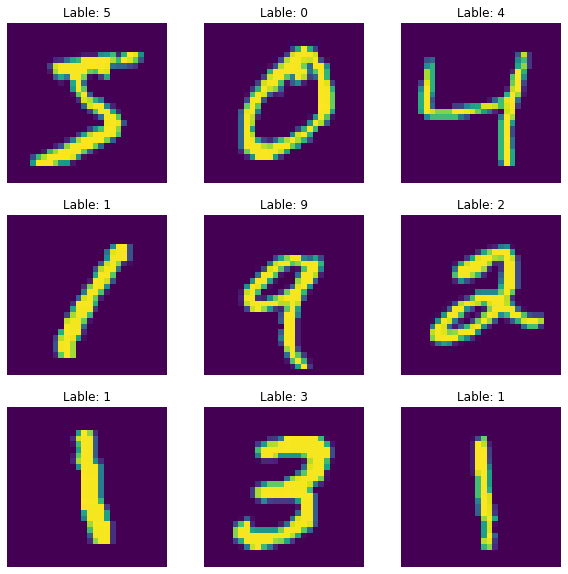

In [ ]:
# Shows training set data
plt.figure(figsize=(10, 10))

for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(trainImages[i].astype("float32"))
  plt.title("Lable: " + str(trainLabels[i]))
  plt.axis("off")

plt.show()

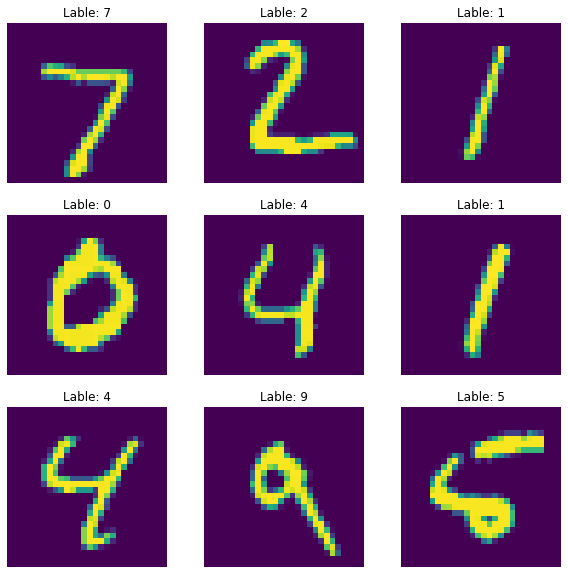

In [ ]:
# Shows validations set data
plt.figure(figsize=(10, 10))

for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(validImages[i].astype("float32"))
  plt.title("Lable: " + str(validLabels[i]))
  plt.axis("off")

plt.show()

In [ ]:
# Reshape images to fit into models
trainImages = trainImages.reshape(-1, 28, 28, 1)
validImages = validImages.reshape(-1, 28, 28, 1)

# 2. Neural Network Design, Training and Evaluation
## FNN model

In [ ]:
# This FNN model was build references the code from FNN.m

'''
%% Define the neural network
layers(1) = imageInputLayer([1 1 input_nodes],'Name','Input'); % 2020b or later version MATLAB can use featureInputLayer(784)

for i = 1 : num_hiddenLayers
    layers(size(layers,2)+1) = fullyConnectedLayer(num_nodes(i),'Name',sprintf('FC_%d',i));
    layers(size(layers,2)+1) = tanhLayer('Name',sprintf('tanh_%d',i));
end

layers(size(layers,2)+1) = fullyConnectedLayer(output_nodes,'Name','Output_layer');
layers(size(layers,2)+1) = softmaxLayer('Name','softmax_3');
layers(size(layers,2)+1) = classificationLayer('Name','Output');

epo = 4;
learningRate = 0.01;
solver = 'adam';
BatchSize = 256;
'''

model = tf.keras.models.Sequential([
  tf.keras.Input(shape=(28,28,1)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512,activation='tanh'),
  tf.keras.layers.Dense(256,activation='tanh'),
  tf.keras.layers.Dense(10,activation='softmax')
])

epo = 4
learningRate = 0.01
BSize = 256

# Set up optimizer,loss
model.compile(
    optimizer=tf.keras.optimizers.Adam(learningRate),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

# Train model
history = model.fit(
    trainImages,trainLabels,
    epochs=epo,
    validation_data=(validImages, validLabels),
    batch_size=BSize
)

Epoch 1/4


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


235/235 [==============================] - 3s 4ms/step - loss: 0.3194 - accuracy: 0.9071 - val_loss: 0.1595 - val_accuracy: 0.9531
Epoch 2/4
235/235 [==============================] - 1s 3ms/step - loss: 0.1421 - accuracy: 0.9566 - val_loss: 0.1593 - val_accuracy: 0.9491
Epoch 3/4
235/235 [==============================] - 1s 3ms/step - loss: 0.1188 - accuracy: 0.9636 - val_loss: 0.1342 - val_accuracy: 0.9616
Epoch 4/4
235/235 [==============================] - 1s 3ms/step - loss: 0.1082 - accuracy: 0.9663 - val_loss: 0.1214 - val_accuracy: 0.9616


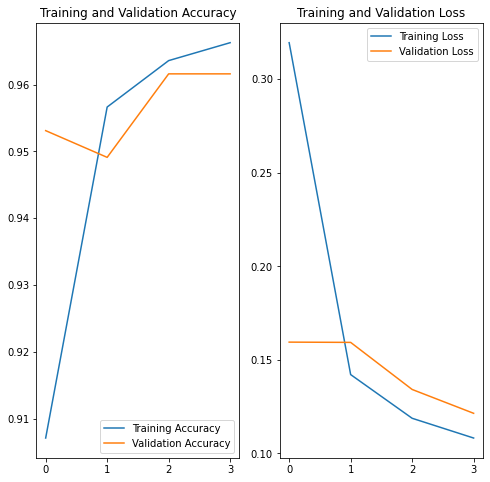

In [ ]:
# Graph the result
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epo)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## CNN model

In [ ]:
# This CNN model was build references the code from CNN.m

'''
%% Define the neural network
layers(1) = imageInputLayer(input_nodes,'Name','Input');

for i = 1 : num_hiddenLayers
    layers(size(layers,2)+1) = convolution2dLayer(size_filters(i,:),number_filters(i),'Padding',1,'Stride',1,'Name',sprintf('Conv_%d',i));
    layers(size(layers,2)+1) = batchNormalizationLayer('Name',sprintf('BN_%d',i));
    layers(size(layers,2)+1) = reluLayer('Name',sprintf('Crelu_%d',i));
    layers(size(layers,2)+1) = maxPooling2dLayer(2,'Stride',2,'Name',sprintf('Pooling_%d',i));
end  

layers(size(layers,2)+1) = fullyConnectedLayer(output_nodes,'Name','Output_layer');
layers(size(layers,2)+1) = softmaxLayer('Name','softmax_output');
layers(size(layers,2)+1) = classificationLayer('Name','Output');

epo = 4;
learningRate = 0.01;
solver = 'adam';
BatchSize = 256;
'''

model = tf.keras.models.Sequential([
  tf.keras.Input(shape=(28,28,1)),
  tf.keras.layers.Conv2D(8, (3, 3), padding='same', activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.ReLU(),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(1, 1), padding='valid'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10,activation='softmax')
])

epo = 4
learningRate = 0.01
BSize = 256

# Set up optimizer,loss
model.compile(
    optimizer=tf.keras.optimizers.Adam(learningRate),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

# Train model
history = model.fit(
    trainImages,trainLabels,
    epochs=epo,
    validation_data=(validImages, validLabels),
    batch_size=BSize
)

Epoch 1/4


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


235/235 [==============================] - 19s 5ms/step - loss: 0.3527 - accuracy: 0.9279 - val_loss: 0.6771 - val_accuracy: 0.8044
Epoch 2/4
235/235 [==============================] - 1s 4ms/step - loss: 0.1176 - accuracy: 0.9644 - val_loss: 0.2010 - val_accuracy: 0.9395
Epoch 3/4
235/235 [==============================] - 1s 4ms/step - loss: 0.0986 - accuracy: 0.9702 - val_loss: 0.1268 - val_accuracy: 0.9629
Epoch 4/4
235/235 [==============================] - 1s 4ms/step - loss: 0.0857 - accuracy: 0.9732 - val_loss: 0.1100 - val_accuracy: 0.9697


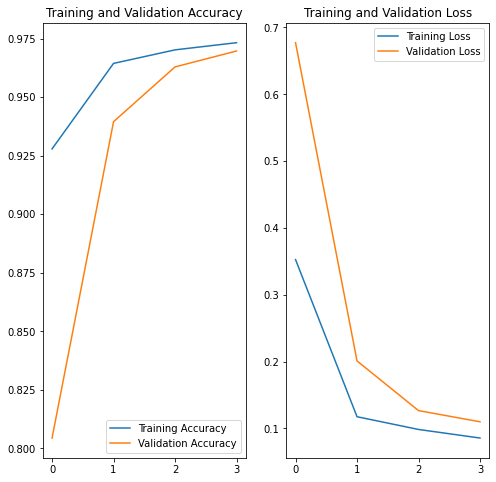

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epo)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# 3. Neural Network Optimization

## FNN model
- Vary num_train, i.e., the number of training examples, and compare the performance on the test set.  
- Vary epo, i.e., the number of epochs, and then record the classification accuracy with respect to epochs.  
- Tune the numbers of layers and nodes in each layer using num_hiddenLayers and num_nodes. Then record the results with the highest accuracy.  
- Investigate the impacts of batch size and learning rate parameters by adjusting
BatchSize and learningRate on the performance.
- Explore other techniques [2] to increase the accuracy, such as using different optimization methods and activation functions.

## My approache
1. Set Dense activation to relu  
2. Adding dropout dense 0.1 to the end  
3. Playing 50 rounds  
4. learning rate to 0.0001  
5. set betch size to 128  
6. Set up the checkpoint functions for saving the best round valid_acc .  
7. Use max training set and vald set for best accuracy.  


In [ ]:
# Model builder
def makeModelFnn(layerNumbers):
  startNum = [4096,2048,1024,512,256,128,64,32,16]

  modelLoop = tf.keras.Sequential()
  modelLoop.add( tf.keras.Input(shape=(28,28,1)) )
  modelLoop.add( tf.keras.layers.Flatten() )

  for k in range(layerNumbers):
    modelLoop.add( tf.keras.layers.Dense(startNum[k], activation='relu') )

  modelLoop.add( tf.keras.layers.Dropout(0.1) )
  modelLoop.add( tf.keras.layers.Dense(10,activation='softmax') )

  return modelLoop

In [ ]:
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from scipy.ndimage import rotate
from datetime import datetime

bestAccArr = []

for i in range(7):

  model = makeModelFnn(i+1)

  epo = 50
  learningRate = 0.0001
  BSize = 128

  # Check point callback function
  checkpoint_filepath = './tmp/checkpoint'
  model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
      filepath=checkpoint_filepath,
      save_weights_only=True,
      monitor='val_accuracy',
      mode='max',
      save_best_only=True
  )

  # Set up optimizer,loss
  model.compile(
      optimizer=tf.keras.optimizers.Adam(learningRate),
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'],
  )

  # Train model
  history = model.fit(
      trainImages,trainLabels,
      epochs=epo,
      validation_data=(validImages, validLabels),
      callbacks=[model_checkpoint_callback],
      batch_size=BSize
  )

  now = datetime.now()
  current_time = now.strftime("%b-%d-%Y_%H:%M:%S")
  srt = "/content/drive/MyDrive/savedModel/" + "ee4016proj1FNN" + current_time + ".h5"

  model.load_weights(checkpoint_filepath)
  #model.save(srt)

  test_loss, test_acc = model.evaluate(validImages, validLabels,verbose=2)
  print(test_acc)
  bestAccArr.append([i,test_acc])

print(bestAccArr)

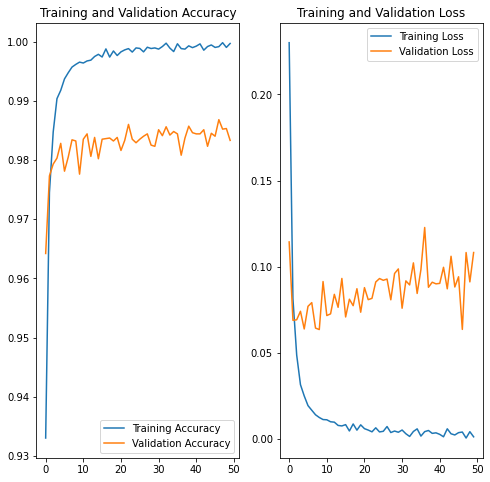

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epo)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

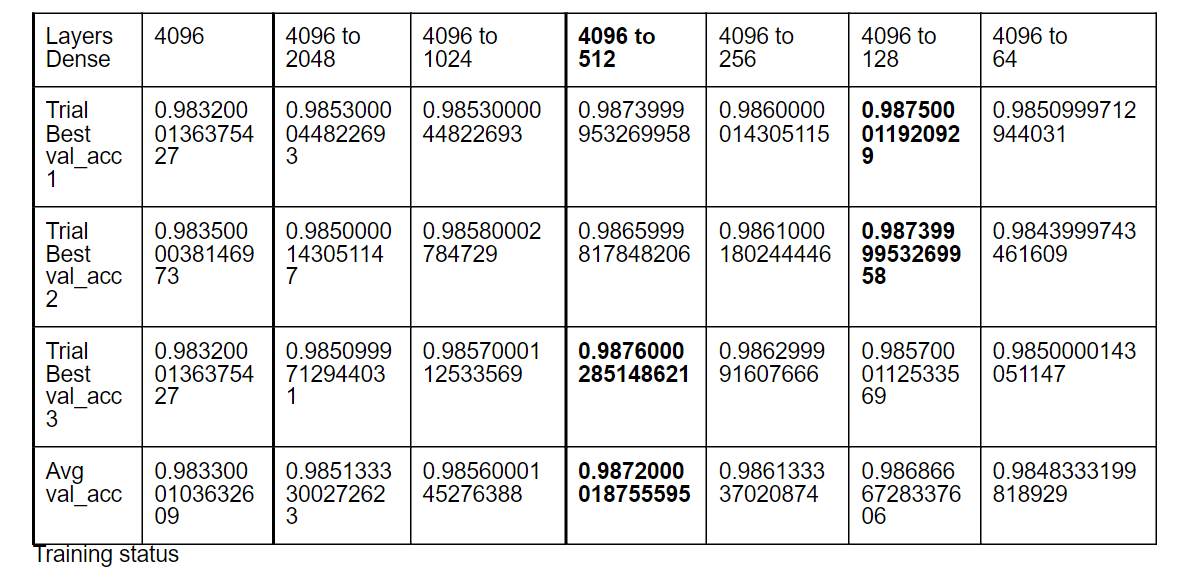

## CNN model
1. Start from 1 to 4 in layers, we using 4 layers Conv2D and other support functions. We start from 128 then 64,32,16,8 rather that 32.
2. Added dropout functions
3. Saved best round
4. setup 128 betch size  
5. Play 30 round  
6. 0.0001 learning rate

In [ ]:
# Model generator for different layers of Conv2D to MaxPooling2D
def makeModel(layerNumbers):
  startNum = [4,8,16,32,64,128,256,512,1024]

  modelLoop = tf.keras.Sequential()
  modelLoop.add( tf.keras.Input(shape=(28,28,1)) )

  for k in range(layerNumbers):
    modelLoop.add( tf.keras.layers.Conv2D( startNum[k] , (3, 3), padding='same', activation='relu') )
    modelLoop.add( tf.keras.layers.Conv2D( startNum[k] , (3, 3), padding='same', activation='relu') )
    modelLoop.add( tf.keras.layers.BatchNormalization() )
    modelLoop.add( tf.keras.layers.ReLU() )
    modelLoop.add( tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(1, 1), padding='valid') )

  modelLoop.add( tf.keras.layers.Flatten() )
  modelLoop.add( tf.keras.layers.Dropout(0.1) )
  modelLoop.add( tf.keras.layers.Dense(10,activation='softmax') )

  return modelLoop

In [ ]:
# record the highest val_acc at each turn
highestArr = []

for i in range(1):
  model = makeModel(i+1)

  epo = 50
  learningRate = 0.0001
  BSize = 128

  checkpoint_filepath = './tmp/checkpoint'
  model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
      filepath=checkpoint_filepath,
      save_weights_only=True,
      monitor='val_accuracy',
      mode='max',
      save_best_only=True
  )

  # Set up optimizer,loss
  model.compile(
      optimizer=tf.keras.optimizers.Adam(learningRate),
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'],
  )

  # Train model
  history = model.fit(
      trainImages,trainLabels,
      epochs=epo,
      validation_data=(validImages, validLabels),
      callbacks=[model_checkpoint_callback],
      batch_size=BSize
  )

  #now = datetime.now()
  #current_time = now.strftime("%b-%d-%Y_%H:%M:%S")
  #srt = "/content/drive/MyDrive/savedModel/" + "ee4016proj1CNN" + current_time + ".h5"

  model.load_weights(checkpoint_filepath)
  #model.save(srt)

  test_loss, test_acc = model.evaluate(validImages, validLabels,verbose=2)
  highestArr.append([i,test_acc])
  print(test_acc)

print(highestArr)

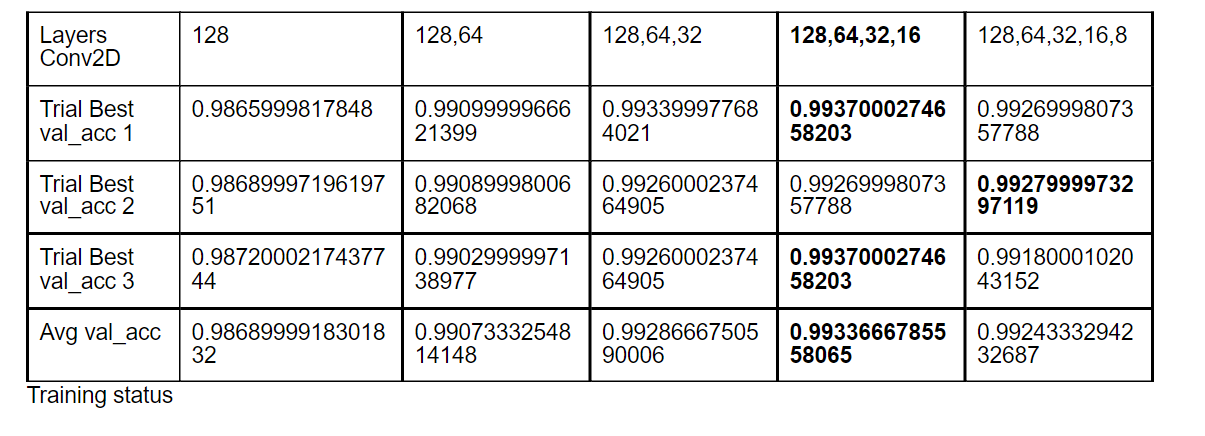

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

predictions = np.argmax(model.predict(validImages), axis=1)
cm = confusion_matrix(validLabels, predictions)

targetArr = ["label " + str(i+1) for i in range(10)]

modelReport = classification_report(validLabels, predictions, target_names=targetArr, zero_division=0, digits=4)
#modelReport = classification_report(validLabels, predictions, zero_division=0)

print("Classification Report:\n----------------------\n", modelReport)

Classification Report:
----------------------
               precision    recall  f1-score   support

     label 1     0.9969    0.9969    0.9969       980
     label 2     0.9956    1.0000    0.9978      1135
     label 3     0.9942    0.9981    0.9961      1032
     label 4     0.9960    0.9980    0.9970      1010
     label 5     0.9919    0.9990    0.9954       982
     label 6     0.9966    0.9944    0.9955       892
     label 7     0.9979    0.9937    0.9958       958
     label 8     0.9971    0.9903    0.9937      1028
     label 9     0.9959    0.9959    0.9959       974
    label 10     0.9950    0.9901    0.9925      1009

    accuracy                         0.9957     10000
   macro avg     0.9957    0.9956    0.9957     10000
weighted avg     0.9957    0.9957    0.9957     10000



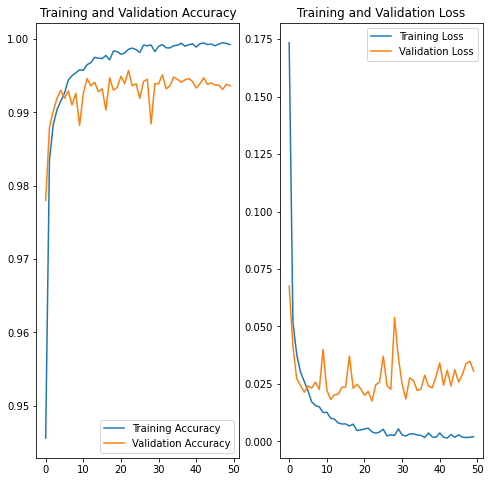

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epo)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Training data with data augmentations mnist

In [ ]:
import tensorflow_datasets as tfds

(train_ds2, valid_ds2) , ds_info2 = tfds.load('mnist', split=['train', 'test'], shuffle_files=True, as_supervised=True, with_info=True)

NUM_CLASSES = ds_info2.features["label"].num_classes

In [ ]:
imgSize = 28
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.05),
  ]
)

expendRound = 6
temp_ds = train_ds2
for i in range(expendRound):
    train_ds2 = train_ds2.concatenate(temp_ds)

train_ds2 = train_ds2.map(lambda image,label:(data_augmentation(image),label)).batch(128)
valid_ds2 = valid_ds2.map(lambda image,label:(image,label)).batch(128)

In [ ]:
def makeModel3():
  startNum = [128,64,32,16]

  modelLoop = tf.keras.Sequential()
  modelLoop.add( tf.keras.Input(shape=(28,28,1)) )

  for k in range(len(startNum)):
    modelLoop.add( tf.keras.layers.Conv2D( startNum[k] , (3, 3), padding='same', activation='selu') )
    modelLoop.add( tf.keras.layers.Conv2D( startNum[k] , (3, 3), padding='same', activation='selu') )
    modelLoop.add( tf.keras.layers.BatchNormalization() )
    modelLoop.add( tf.keras.layers.LeakyReLU() )
    modelLoop.add( tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(1, 1), padding='valid') )
    
  
  modelLoop.add( tf.keras.layers.Dropout(0.4) )
  modelLoop.add( tf.keras.layers.Flatten() )
  modelLoop.add( tf.keras.layers.Dense(256,activation='relu') )
  modelLoop.add( tf.keras.layers.Dropout(0.1) )
  modelLoop.add( tf.keras.layers.Dense(128,activation='relu') )
  modelLoop.add( tf.keras.layers.Dropout(0.1) )
  modelLoop.add( tf.keras.layers.Dense(10,activation='softmax') )

  return modelLoop

In [ ]:
# record the highest val_acc at each turn
highestArr = []

for i in range(1):
  model = makeModel3()

  epo = 50
  learningRate = 0.0001
  BSize = 64

  checkpoint_filepath = './tmp/checkpoint'
  model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
      filepath=checkpoint_filepath,
      save_weights_only=True,
      monitor='val_accuracy',
      mode='max',
      save_best_only=True
  )

    # Set up optimizer,loss
  model.compile(
      optimizer=tf.keras.optimizers.Adam(learningRate),
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'],
  )

    # Train model
  history = model.fit(
      train_ds2,
      epochs=epo,
      validation_data=valid_ds2,
      callbacks=[model_checkpoint_callback],
      batch_size=BSize
  )

  #now = datetime.now()
  #current_time = now.strftime("%b-%d-%Y_%H:%M:%S")
  #srt = "/content/drive/MyDrive/savedModel/" + "ee4016proj1CNN" + current_time + ".h5"

  model.load_weights(checkpoint_filepath)
  #model.save(srt)

  test_loss, test_acc = model.evaluate(valid_ds2 ,verbose=2)
  highestArr.append([i,test_acc])
  print(test_acc)

print(highestArr)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


3282/3282 [==============================] - 295s 85ms/step - loss: 0.0975 - accuracy: 0.9698 - val_loss: 0.0363 - val_accuracy: 0.9883
Epoch 2/50
3282/3282 [==============================] - 271s 83ms/step - loss: 0.0350 - accuracy: 0.9892 - val_loss: 0.0207 - val_accuracy: 0.9931
Epoch 3/50
3282/3282 [==============================] - 270s 82ms/step - loss: 0.0249 - accuracy: 0.9921 - val_loss: 0.0202 - val_accuracy: 0.9946
Epoch 4/50
3282/3282 [==============================] - 269s 82ms/step - loss: 0.0190 - accuracy: 0.9939 - val_loss: 0.0213 - val_accuracy: 0.9940
Epoch 5/50
3282/3282 [==============================] - 266s 81ms/step - loss: 0.0158 - accuracy: 0.9951 - val_loss: 0.0207 - val_accuracy: 0.9943
Epoch 6/50
3282/3282 [==============================] - 268s 82ms/step - loss: 0.0131 - accuracy: 0.9958 - val_loss: 0.0216 - val_accuracy: 0.9935
Epoch 7/50
3282/3282 [==============================] - 263s 80ms/step - loss: 0.0117 - accuracy: 0.9962 - val_loss: 0.0248 - val

KeyboardInterrupt: ignored

## References
1. plt code
https://www.tensorflow.org/tutorials/images/classification